In [38]:
import math
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [41]:
def get_meta_entity(meta, metadata_entities):
    cur_authors =  meta["Authors"].split(",")
    
    #Nodes ggf Edges mit Typen belegen (zB Author, Paper whatever), Typen im Nachgang zur einer Kategorialen Variable/Spalte in einem gesonderten Dataframe bauen
    #Colormap mit (anzahl Types) möglichen Farben. bei Draw, node_color = categorial, cmap=colormap
    #siehe https://towardsdatascience.com/customizing-networkx-graphs-f80b4e69bedf

    metadata_entities.add_node("Paper")
    metadata_entities.add_node(meta["Titles"], date=meta["Date"])
    metadata_entities.add_node("Autor")
    
    metadata_entities.add_edge("Paper", meta["Titles"], label="ist")
    
    for author in cur_authors:
        metadata_entities.add_node(author)
        metadata_entities.add_edge(author, meta["Titles"], label="hat verfasst")
        metadata_entities.add_edge("Autor", author, label="ist")
    
    return metadata_entities

In [42]:
metadata_csv = pd.read_excel('C:/Users/Jana/OneDrive/Dokumente/Desktop/Uni/Master/Thesis/PaperDatenextraktion/metadata_list.xlsx')
G_Meta= nx.MultiDiGraph()


for i in range(len(metadata_csv)):
    G_Meta = get_meta_entity(metadata_csv.iloc[i], G_Meta)
print(G_Meta)

MultiDiGraph with 45 nodes and 75 edges


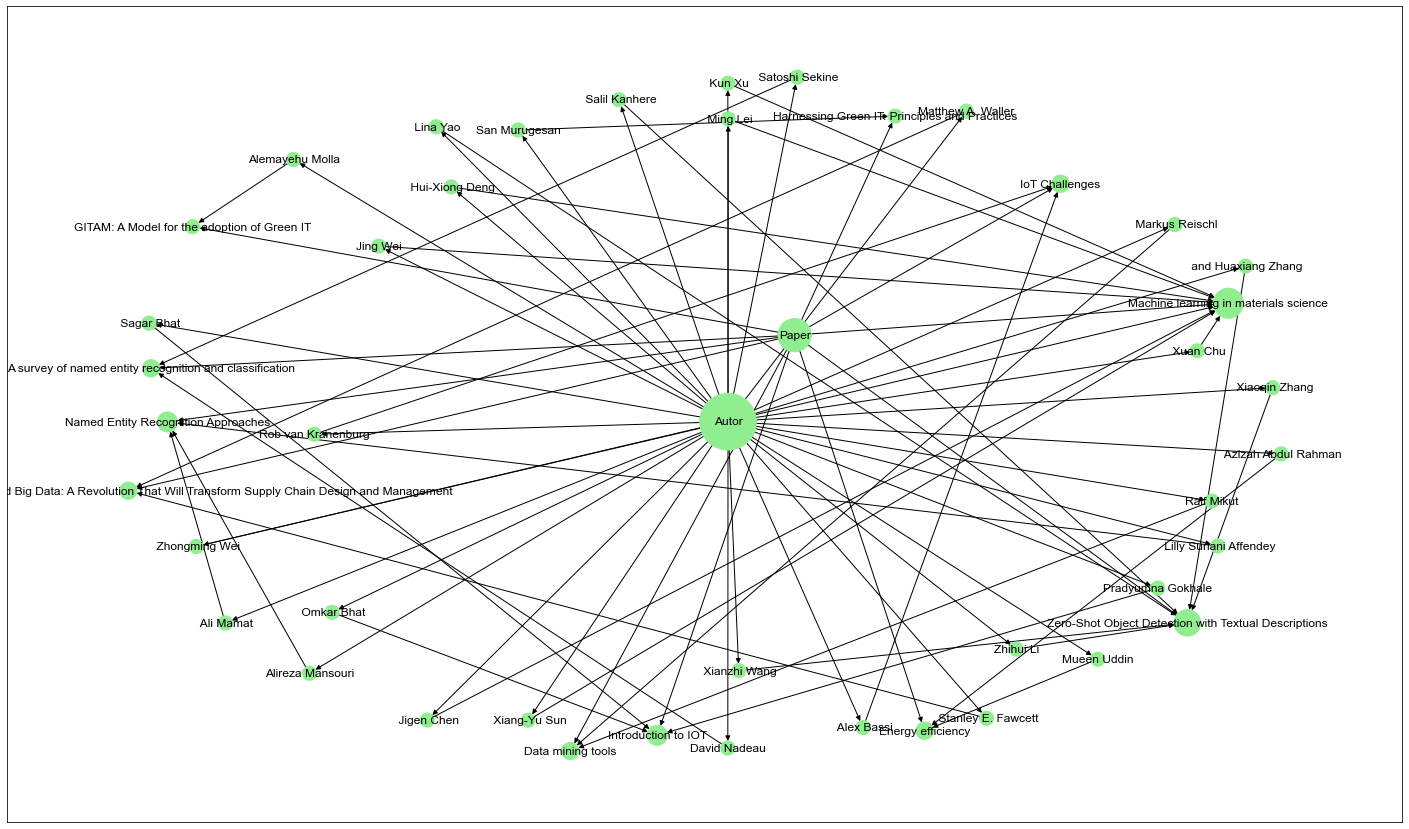

In [43]:
plt.figure(figsize=(25,15))

pos = nx.spring_layout(G_Meta, k=10/math.sqrt(G_Meta.order()))
d = dict(G_Meta.degree)
#edge_cmap=plt.cm.Blues
#weight='weight'
nx.draw_networkx(G_Meta, with_labels=True, pos=pos, node_size=[v * 100 for v in d.values()], node_color='lightgreen', font_family = 'Arial')
plt.show()

In [20]:

#print(G_Meta.data())
list(G_Meta.nodes(data))

NameError: name 'data' is not defined